# **BIBLIOTECA PANDAS** $\ast_\ast$

### **SÉRIES**

In [1]:
import pandas as pd
import numpy as np


# -----------------------------------------------------------------------------
# %%Primeiros passos
# -----------------------------------------------------------------------------

s1 = pd.Series(np.arange(1,10,2), name = "Coluna impar")
s2 = pd.Series(np.arange(0,10,2), name = "Coluna par")

print(s1)
print(s2)

0    1
1    3
2    5
3    7
4    9
Name: Coluna impar, dtype: int32
0    0
1    2
2    4
3    6
4    8
Name: Coluna par, dtype: int32


### **DATAFRAME**
- Data table with random elements

In [2]:
#Data Table with random elements:
rng = np.random.RandomState()
#rng.randint(valores(X = linhas, y = colunas))
data = pd.DataFrame(rng.randint(0, 10, size=(3,4)),
                  columns = ['Bacia', 'resevatórios', 'vazão', 'ENA'],
                  index = ["estágio 1", "estágio 2", "estágio 3"])

print(data)

           Bacia  resevatórios  vazão  ENA
estágio 1      9             6      2    9
estágio 2      6             2      5    5
estágio 3      2             0      3    6


### **VISUALIZAÇÃO DE DADOS**

- Base de dados da ONS sobre o intercâmbio entre Subsistemas 2022;
- base horária, em MWmed;
- As grandezas representam a soma das medidas de fluxo de potência ativa nas linhas de transmissão de fronteira entre os subsistemas;

In [3]:

#------------------------------------------------
# DADOS DE INTERCÂMBIOS ENTRE SUBSISTEMAS
#------------------------------------------------

#Descrição do Dado:
#Descricao = pd.DataFrame ({
#   columns = ['Descrição', 'Código', 'Tipo de Dado', 'Formato', 'Permite valor nulo', 'Permite valor zerado', 'Permite valor negativo']
#}
#)

In [4]:
df_intercambio = pd.read_csv("INTERCAMBIO_NACIONAL_2022.csv", sep=";")

In [5]:
"""
head, tail, index , columns, describe and transposta
"""

df_intercambio.head()

,din_instante,id_subsistema_origem,nom_subsistema_origem,id_subsistema_destino,nom_subsistema_destino,val_intercambiomwmed
0,2022-01-01 00:00:00,N,NORTE,NE,NORDESTE,1559.685
1,2022-01-01 00:00:00,N,NORTE,SE,SUDESTE,6183.747
2,2022-01-01 00:00:00,NE,NORDESTE,SE,SUDESTE,61.329
3,2022-01-01 00:00:00,SE,SUDESTE,S,SUL,6600.121
4,2022-01-01 01:00:00,N,NORTE,NE,NORDESTE,1671.589


In [6]:
""" DESCRIBE"""
#Fornece as informações descritivas dos dados
#Associado à estatistica: média, desvio padrão, percentil, quartil, etc
df_intercambio.describe()

,val_intercambiomwmed
count,18432.000000
mean,3694.704334
std,3805.013593
min,-6509.084000
25%,1013.133500
50%,2842.503500
75%,7062.916000
max,10807.812000


In [7]:
"""Visualizar apenas uma coluna"""
df_intercambio[["nom_subsistema_origem", "id_subsistema_destino"]]

,nom_subsistema_origem,id_subsistema_destino
0,NORTE,NE
1,NORTE,SE
2,NORDESTE,SE
3,SUDESTE,S
4,NORTE,NE
...,...,...
18427,SUDESTE,S
18428,NORTE,NE
18429,NORTE,SE
18430,NORDESTE,SE


In [8]:
df_intercambio[["nom_subsistema_origem", "id_subsistema_destino"]].shape[0]

18432

In [9]:
#df_intercambio[["nom_subsistema_origem"]
#norte = ["N" for a in df_intercambio[["nom_subsistema_origem"] if True]
#print(norte)                                       

In [10]:
"""ILOC"""
#É um maneira de selecionar dados dentro do DataFrame
#Dados de uma linha específica
df_intercambio.iloc[0]

din_instante              2022-01-01 00:00:00
id_subsistema_origem                        N
nom_subsistema_origem                   NORTE
id_subsistema_destino                      NE
nom_subsistema_destino               NORDESTE
val_intercambiomwmed                 1559.685
Name: 0, dtype: object

In [11]:
#5:10 = linhas que eu quero analisar
# depois da vírgula = colunas
#Também possível colocar por "nome"
df_intercambio.iloc[5:10, 2:4]

,nom_subsistema_origem,id_subsistema_destino
5,NORTE,SE
6,NORDESTE,SE
7,SUDESTE,S
8,NORTE,NE
9,NORTE,SE


In [12]:
"""INDEXAÇÃO BOOLEANA
Erro porque não há subsistema de origem == S
"""

#Expressão booleana para filtrar dados
#if df_intercambio[df_intercambio["id_subsistema_origem"] == "S"]:
#    print(df_intercambio)
#a = df_intercambio.iloc[:, 1]
#for subsistema in a:
#    if a == "S":
#        print(a)

'INDEXAÇÃO BOOLEANA\nErro porque não há subsistema de origem == S\n'

In [13]:
"""Fornecer porcentagem"""
df_intercambio['nom_subsistema_origem'].value_counts(normalize=True)

NORTE       0.50
NORDESTE    0.25
SUDESTE     0.25
Name: nom_subsistema_origem, dtype: float64

In [14]:
df_intercambio['nom_subsistema_destino'].value_counts(normalize=True)

SUDESTE     0.50
NORDESTE    0.25
SUL         0.25
Name: nom_subsistema_destino, dtype: float64

In [15]:
df_intercambio.apply(np.cumsum)

,din_instante,id_subsistema_origem,nom_subsistema_origem,id_subsistema_destino,nom_subsistema_destino,val_intercambiomwmed
0,2022-01-01 00:00:00,N,NORTE,NE,NORDESTE,1.559685e+03
1,2022-01-01 00:00:002022-01-01 00:00:00,NN,NORTENORTE,NESE,NORDESTESUDESTE,7.743432e+03
2,2022-01-01 00:00:002022-01-01 00:00:002022-01-...,NNNE,NORTENORTENORDESTE,NESESE,NORDESTESUDESTESUDESTE,7.804761e+03
3,2022-01-01 00:00:002022-01-01 00:00:002022-01-...,NNNESE,NORTENORTENORDESTESUDESTE,NESESES,NORDESTESUDESTESUDESTESUL,1.440488e+04
4,2022-01-01 00:00:002022-01-01 00:00:002022-01-...,NNNESEN,NORTENORTENORDESTESUDESTENORTE,NESESESNE,NORDESTESUDESTESUDESTESULNORDESTE,1.607647e+04
...,...,...,...,...,...,...
18427,2022-01-01 00:00:002022-01-01 00:00:002022-01-...,NNNESENNNESENNNESENNNESENNNESENNNESENNNESENNNE...,NORTENORTENORDESTESUDESTENORTENORTENORDESTESUD...,NESESESNESESESNESESESNESESESNESESESNESESESNESE...,NORDESTESUDESTESUDESTESULNORDESTESUDESTESUDEST...,6.810150e+07
18428,2022-01-01 00:00:002022-01-01 00:00:002022-01-...,NNNESENNNESENNNESENNNESENNNESENNNESENNNESENNNE...,NORTENORTENORDESTESUDESTENORTENORTENORDESTESUD...,NESESESNESESESNESESESNESESESNESESESNESESESNESE...,NORDESTESUDESTESUDESTESULNORDESTESUDESTESUDEST...,6.809883e+07
18429,2022-01-01 00:00:002022-01-01 00:00:002022-01-...,NNNESENNNESENNNESENNNESENNNESENNNESENNNESENNNE...,NORTENORTENORDESTESUDESTENORTENORTENORDESTESUD...,NESESESNESESESNESESESNESESESNESESESNESESESNESE...,NORDESTESUDESTESUDESTESULNORDESTESUDESTESUDEST...,6.810110e+07
18430,2022-01-01 00:00:002022-01-01 00:00:002022-01-...,NNNESENNNESENNNESENNNESENNNESENNNESENNNESENNNE...,NORTENORTENORDESTESUDESTENORTENORTENORDESTESUD...,NESESESNESESESNESESESNESESESNESESESNESESESNESE...,NORDESTESUDESTESUDESTESULNORDESTESUDESTESUDEST...,6.810434e+07


In [16]:
#df_intercambio["val_intercambiomwmed"].apply(lambda x: x.max())

<AxesSubplot:ylabel='nom_subsistema_destino'>

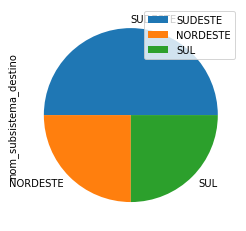

In [17]:
df_intercambio['nom_subsistema_destino'].value_counts(normalize=True).plot(kind = 'pie', legend = True)

In [26]:
""" AGRUPAMENTO = GROUP BY """
teste_groupby = df_intercambio.groupby(["id_subsistema_destino","nom_subsistema_destino"])
print(teste_groupby)